## 1.1 Modelo SIR simples sem nascimentos e mortes

Baseado em: http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.1/index.html

Considere uma "população fechada" sem mudanças demográficas (sem nascimentos, mortes ou migrações). 

### 1.1.1 Faça o questionamento

**Problema**: COVID-19, uma nova cepa do _Corona vírus_ muito contagioso apareceu no mundo. O vírus de origem chinesa está se espalhando e matando rapidamente.

**Questionamento**: Qual seria o momento de pico de contaminação aqui no Brasil? Modele a expansão dessa pandemia.

**Variáveis**:

 * $t$ = unidade de tempo (em dia);
 * $P_\text{total}$ = tamanho da população brasileira residente no país;
 * $P_i(0)$ = população de infectados no tempo $t=0$;


 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão.
    Número de assinantes (assinantes);
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente estejamos mais interessados em sua recíproca (1/$\gamma$), que determina o período infeccioso médio;


 * $S(t)$ = proporção de indivíduos não infectados com a doença no momento $t$, ou aqueles suscetíveis à doença;
 * $I(t)$ = proporção de indivíduos que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria susceptível;
 * $R(t)$ = proporção de recuperados (removidos a partir da doença);
    
    
 * $S(0)$ = proporção inicial da população que está suscetível;
 * $I(0)$ = proporção inicial da população que está suscetível;
 * $R(0)$ = proporção inicial de recuperados da doença.

**Hipóteses (_assumptions_):**

 * $S(0)+I(0)$ $\geq 1$;  
 
 
 * $P_\text{total}$ = $S(t) + I(t) + R(t) = 200.000.000$ (estimativa);
 * $P_i(0)$ = $1$, pois é um vírus novo, ao contrário da gripe, por exemplo;  


 * $S(0)$ = $\frac{P_\text{total} - P_i(0)}{P_\text{total}} = 
    \frac{200.000.000 - 1}{200.000.000} = 0,999.999.995$,  pois é um vírus novo, ao contrário da gripe, por exemplo;
 * $I(0)$ = $\frac{P_\text{total} - P_i(0)}{P_\text{total}} = 
    \frac{1}{200.000.000} = 0,000.000.005$
     pois o vírus veio importado;
 * $R(0)$ = $0$;  
    
    
 * $\beta$ = Definido nas simulações; 
 * $\gamma$ = Definido nas simulações;  

**Objetivo:** Encontrar o $t$ em $I(t)$ atinge o maior valor.

### 1.1.2 Selecione a abordagem do modelo

A abordagem selecionada para a resolução do problema é a resolução do sistema SIR.


### 1.1.3 Formule o modelo

Tendo em consideração que o modelo foi construído enviesado ao sistema SIR, podemos já utilizar as equações:

\begin{align*}
    \frac{dS(t)}{dt} &= -\beta S(t)I(t) \\
    \frac{dI(t)}{dt} &=  \beta S(t)I(t)-\gamma I(t) \\
    \frac{dR(t)}{dt} &=  \gamma I(t)
\end{align*}

### 1.1.4 Solucione o modelo

O modelo foi executado iterativamente. Abaixo as simulações para diferentes valores de $\beta$ e de  $\gamma$.

```python
####################################################################
###    This is the PYTHON version of program 2.1 from page 19 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the simple SIR epidemic without births or deaths.        #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################
```

In [8]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

from plot import plot

In [19]:
def simulacao(β, γ):
    P = 200_000_000
    P_i = 1

    S_0 = (P-P_i)/P
    I_0 = P_i/P
    R_0 = 0

    def diff_eqs(passo_anterior, t):
        S, I, R = passo_anterior

        S_next = -β * S * I
        I_next = β*S*I - γ*I
        R_next = γ*I

        return np.array([S_next, I_next, R_next])

    INPUT = (S_0, I_0, R_0)
    
    tempo_step = 1.
    numero_dias = 90.0

    t_inicio = 0.0; t_fim = numero_dias; t_incremento = tempo_step
    t_intervalo = np.arange(t_inicio, t_fim + t_incremento, t_incremento)

    plot(spi.odeint(diff_eqs, INPUT, t_intervalo))

#### 1.1.4.1 Cenário 1

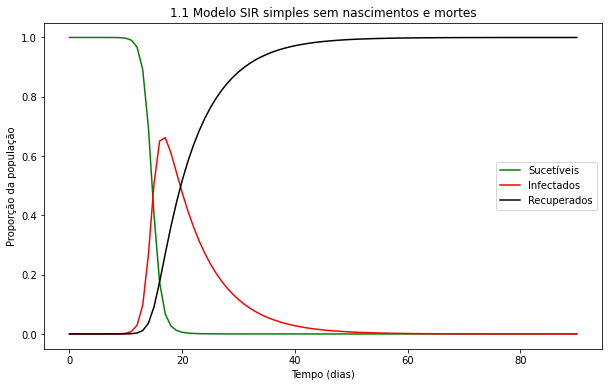

In [20]:
simulacao(β = 1.4247, γ = 0.14286)

#### 1.1.4.2 Cenário 2

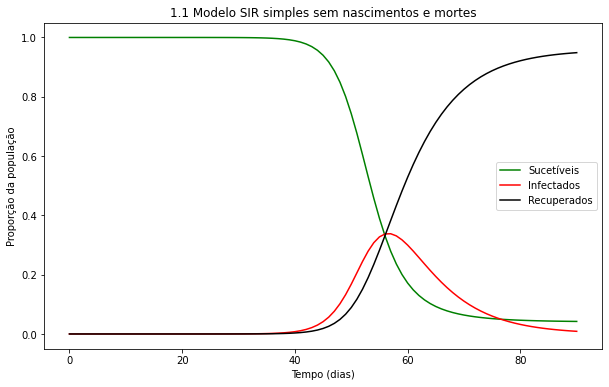

In [30]:
simulacao(β = .5, γ = 0.15)

#### 1.1.4.3 Cenário 3

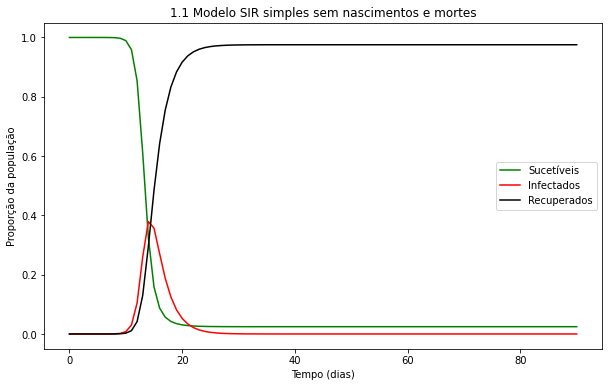

In [32]:
simulacao(β = 1.9, γ = 0.5)

### 1.1.5 Responda o questionamento

Foram testados três cenários